In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
data=pd.read_csv("/content/adm_data.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.drop(columns=['Serial No.'],inplace=True)

In [6]:
x=data.drop(['Research'],axis=1)
y=data['Research']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
prediction=knn.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_test,prediction)
cm=confusion_matrix(y_test,prediction)
print(ac)
print(cm)

0.75
[[29  9]
 [11 31]]


In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_reduced_train=pd.DataFrame(pca.fit_transform(x_train))
x_reduced_test=pd.DataFrame(pca.fit_transform(x_test))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_reduced_train,y_train)
prediction=knn.predict(x_reduced_test)

In [18]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


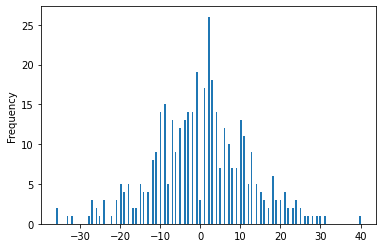

In [21]:
data['GRE Score'].diff().plot(kind='hist',bins=200)

Text(0, 0.5, 'yaxis')

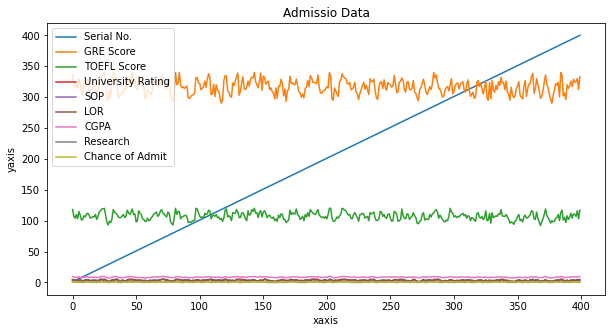

In [24]:
ax=data.plot(figsize=(10,5),title='Admissio Data')
ax.set_xlabel('xaxis')
ax.set_ylabel('yaxis')

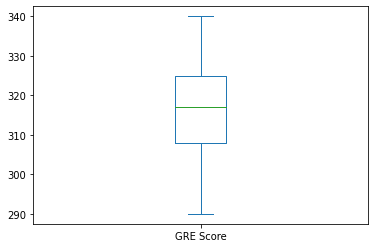

In [28]:
data['GRE Score'].plot(kind='box')

In [36]:
data['SOP'].median()

3.5

In [30]:
np.mean(data['GRE Score'])

316.8075

In [35]:
np.mean(data['SOP'])

3.4

In [38]:
data.shape

(400, 9)

In [39]:
round((pd.isnull(data).sum()/data.shape[0])*100,2)

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

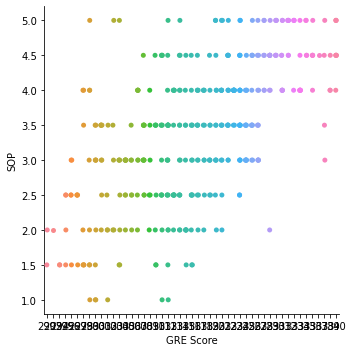

In [41]:
snr.catplot(data=data,x='GRE Score',y='SOP')